# ⛰️ Uçurum Yürüyüşü
---

Bu meydan okumada, pekiştirmeli öğrenme modellerini eğitmek için Gymnasium ve Stable Baselines3 kullanımının temel yönlerini öğreneceksiniz. Bu meydan okuma, ortamları kurma, modelleri eğitme, performanslarını görselleştirme ve son olarak eğitilmiş bir modeli bir ortamla etkileşim kurmak için kullanma konularında bütüncül bir anlayış kazandırmanız için tasarlanmıştır.

---
Tüm import ifadelerinizi notebook'unuzun en üstüne koyarak notebook'unuzu tekrar çalıştırmayı kolaylaştırmak iyi bir alışkanlıktır.

Meydan okumalar boyunca import ifadeleri eklemeniz gerekecek. Hepsini aşağıdaki hücreye ekleyin.

In [1]:
import os
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv

# Stable Baselines3 - Algoritmalar
# Genellikle en yaygın kullanılanlar PPO ve DQN'dir, ihtiyaca göre diğerleri eklenebilir.
from stable_baselines3 import PPO, DQN

# Model Değerlendirme ve Ortam Yardımcıları
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor

# Çıktıların notebook içinde görünmesi için (eğer Jupyter kullanıyorsanız)
%matplotlib inline

---

### 🎯 Meydan Okumanın Hedefleri

#### 🏋️‍♀️ Gymnasium'a Aşinalık Kazanın:
Gymnasium'dan [CliffWalking ortamını](https://gymnasium.farama.org/environments/toy_text/cliff_walking/) keşfederek başlayacağız. Ortamları yönetmek ve görselleştirmek için kullanılan temel yöntemleri anlayın. Ortamları yüklemeyi ve sıfırlamayı, eylemler almayı ve sonuçları görselleştirmeyi öğrenin.

#### 🤖 Stable Baselines3 Kullanmayı Öğrenin:
Bir pekiştirmeli öğrenme modelini kurmak ve eğitmek için Stable Baselines3 kütüphanesini kullanın. Bir modeli yapılandırmayı, eğitim parametrelerini ayarlamayı ve Deep Q-Network (DQN) gibi popüler bir algoritma kullanarak eğitim sürecini başlatmayı öğreneceksiniz.

#### 📈 Eğitim Performansını Görselleştirin:
Modelinizin eğitim performansını izlemek ve çizmek için günlük tutma ve TensorBoard gibi görselleştirme araçlarını uygulayın. Eğitim stratejilerinizin etkinliğini değerlendirmek için bölüm başına ödüller ve öğrenme eğrileri gibi metrikleri analiz edin.

#### 💾 Eğitilmiş Bir Modeli Yükleyin ve Dağıtın:
Eğitim sonrasında, eğitilmiş bir modeli kaydetmeyi ve daha sonra yüklemeyi öğrenin. Bu modeli, ajanın CliffWalking ortamıyla etkileşim kurduğu bir simülasyon çalıştırmak için kullanın ve öğrenilen politikaları ortamda etkili bir şekilde gezinmek için uygulayın.

#### 🔍 Değerlendirin ve Düşünün:
Eğitilmiş modelin ortam içindeki gerçek zamanlı etkileşimlerdeki performansını değerlendirin. Öğrenme süreci ve ajanın davranışı üzerine düşünün, farklı yapılandırmaların ve eğitim sürelerinin sonuçları nasıl etkileyebileceğini anlayın.

---
### Bölüm 1: CliffWalking Ortamını Keşfetmek

Bu ilk görevde, Gymnasium'dan [CliffWalking ortamını](https://gymnasium.farama.org/environments/toy_text/cliff_walking/) kuracaksınız.

#### 📝 Takip Edilecek Adımlar:

#### 0. ⚙️ Paketi içe aktarın:
Notebook'unuzun en üstündeki hücreye gymnasium'u içe aktarın. Kodumuzda `gym` olarak kullanabildiğimizden emin olun.

#### 1. 🗂️ Ortamı Yükleyin:
- `CliffWalking` ortamını yüklemek için `.make()` metodunu kullanın.  
- Ortamı görselleştirmek için `render_mode`'u uygun şekilde ayarlayın.

Not: `gymnasium` dokümantasyonu size `CliffWalking-v1` kullanmanızı söylüyor, ancak bu henüz uyumluluk nedenleriyle kullandığımız `gymnasium` sürüm 1.0.0'da bulunmuyor. Bunun yerine `CliffWalking-v0` kullanın.

In [2]:
# 1. Ortamı Yükleyin
# Not: Versiyon uyumluluğu için v1 yerine v0 kullanıyoruz.
# render_mode="rgb_array": Notebook içinde görselleştirmeyi kolaylaştırmak için.
env = gym.make("CliffWalking-v0", render_mode="rgb_array")

# Ortamı her zaman kullanmadan önce bir kez resetlememiz gerekir
initial_state, info = env.reset()

print("✅ Ortam başarıyla yüklendi!")
print(f"📍 Başlangıç Durumu (State): {initial_state}")
print(f"👀 Gözlem Uzayı (Observation Space): {env.observation_space}")
print(f"🎮 Eylem Uzayı (Action Space): {env.action_space}")

✅ Ortam başarıyla yüklendi!
📍 Başlangıç Durumu (State): 36
👀 Gözlem Uzayı (Observation Space): Discrete(48)
🎮 Eylem Uzayı (Action Space): Discrete(4)


#### 2. 🔄 Ortamı Başlatın:
Ortamı başlangıç durumuna getirmek için `.reset()` metodunu çağırın — onunla etkileşim kurmadan önce gereklidir. `.reset()` metodu bir durum döndürür: başlangıç durumunu. Bunu bir değişkende saklayın ve yazdırın.

> `UserWarning: pkg_resources is deprecated ...` uyarısını görebilirsiniz. Bunu görmezden gelebilirsiniz.

In [3]:
# Ortamı sıfırla ve dönen değerleri ayrıştır (unpack)
observation, info = env.reset()

print(f"Başlangıç Durumu (State): {observation}")

Başlangıç Durumu (State): 36


`(36, {'prob': 1})` çıktısı ortamın durumu hakkında iki bilgi parçası sağlar:

**🔢 Durum İndeksi (36)**: Bu sayı, ajanın başlangıçta ortam ızgarası içindeki belirli konumunu temsil eder. Örneğin 'CliffWalking-v0' ortamında, `36` indeksi ajanın bölümü başlattığı başlangıç durumuna karşılık gelir.

**🎲 Olasılık Bilgisi ({'prob': 1})**: Bu sözlük, durum hakkında, özellikle geçiş olasılığı hakkında ek ayrıntılar gösterir. `'prob'` anahtarının `1` değeri, bu duruma geçişin 1 olasılığıyla gerçekleştiğini, yani kesin olduğunu gösterir. Bu mantıklıdır çünkü ajan mutlaka bu durumda başlayacaktır.

#### 3. 👀 Ortamı Görselleştirin:
Herhangi bir eylem almadan önce ortamı görüntülemek ve düzenini anlamak için `.render()` metodunu kullanın.

Kurulumunuza bağlı olarak, yeni durum önceki adımdan sonra zaten işlenmiş olabileceği için bu adıma ihtiyacınız olmayabilir.

/home/egkpnr/.pyenv/versions/3.12.9/envs/reinforcement-env/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


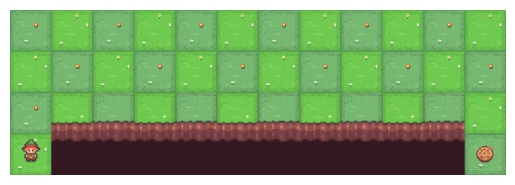

In [4]:
# 3. Ortamı Görselleştirin

# Ortamdan o anki kareyi (frame) alalım
frame = env.render()

# Matplotlib kullanarak bu kareyi çizelim
plt.imshow(frame)
plt.axis("off")  # Eksen sayılarını gizleyerek daha temiz bir görüntü elde edelim
plt.show()

#### 4. 🧹 Ortamı Kapatın:
İşiniz bittiğinde kaynakları serbest bırakmak için `.close()` çağırarak ortamı düzgün bir şekilde kapatın.

<details>
  <summary markdown='span'>⚠️ <strong>macOS için kapatma hakkında not</strong></summary>
  
  `.close()` ortam penceresini kapatmayacak. Bu sorun değil, **açık bırakabilirsiniz**. Pencere sonraki adımlarda tekrar kullanılacak.

  Meydan okumanın sonunda ve **sadece sonunda**, ortam penceresini kapatmak için onu kendiniz zorla sonlandırmanız gerekecek:
  1. Pencereyi bulun ve kapatmak için kırmızı düğmeye tıklayın. (Bu başarısız olacak.)
  1. Ekranınızın sol üst köşesinde Apple sembolüne tıklayın.
  1. `Force Quit`'i (Zorla Çıkış) seçin.
  1. İşlem listesinde `python (Not Responding)` işlemini bulun. Onu seçin.
  1. `Force Quit` düğmesine tıklayın.

  Bu çekirdeğinizi sonlandıracağından, **bunu sadece meydan okumanın sonunda yapın**.

  Bu durum Jupyter Notebook içinde çalıştırdığımız için oluyor. Kodunuzu bir `.py` dosyasına taşırsanız, bu davranışı görmezsiniz.

</details>

In [5]:
# 4. Ortamı Kapatın
env.close()

---
### Bölüm 2: Ortamla Etkileşim Kurmak

Şimdi ortamı tekrar yükleyelim, rastgele bir adım atalım ve sonucu gösterelim. Bu, ortamlarla etkileşim kurmak için temel metotları tanıtacak — ajanların nasıl hareket ettiğini ve geri bildirim aldığını anlamanıza yardımcı olacak.

#### 1. 🗂️ Ortamı Yükleyin
- Ortamı yükleyin.
- Başlangıç durumuna sıfırlayın.
- Başlangıç durumunu yazdırın.

In [6]:
# 1. Ortamı Yükleyin
env = gym.make("CliffWalking-v0", render_mode="rgb_array")

# 2. Başlangıç durumuna sıfırlayın
observation, info = env.reset()

# 3. Başlangıç durumunu yazdırın
print(f"🔄 Ortam yüklendi ve sıfırlandı.")
print(f"📍 Başlangıç Durumu (State): {observation}")

🔄 Ortam yüklendi ve sıfırlandı.
📍 Başlangıç Durumu (State): 36


#### 2. 🎲 Bir Eylem Örnekleyin:
- Ortamın eylem alanından rastgele bir eylem seçmek için `.action_space.sample()` kullanın — keşfi simüle eder.
- Bunu bir değişkende kaydedin.
- Eylemin türünü ve değerini inceleyin.
- Hücreyi birkaç kez çalıştırın. Hangi değerleri görüyorsunuz? Bunlar neyi temsil ediyor?

In [7]:
# 2. Bir Eylem Örnekleyin

# Eylem uzayından rastgele bir eylem seçelim
action = env.action_space.sample()

# Değeri ve türünü yazdıralım
print(f"🎲 Rastgele Seçilen Eylem: {action}")
print(f"📄 Eylemin Türü: {type(action)}")

🎲 Rastgele Seçilen Eylem: 3
📄 Eylemin Türü: <class 'numpy.int64'>


#### 2. 🦶 Eylemi Gerçekleştirin:
- `.step()` kullanarak eylemi uygulayın.  
- Bu şunları döndürür:  
  - Yeni durum  
  - Ödül  
  - Bir `done` bayrağı (bölüm bitmiş mi değil mi)  
  - Ek bilgi (varsa)
- "tuple unpacking" kullanarak bu dönen değerlerin her birini bir değişkende kaydedin. Onları yazdırın. Yeni durum, ödül ve done dönüş değerlerini anlıyor musunuz?
- Bu **sıfırla > eylem > adım** dizisini birkaç kez çalıştırın ve farklı sonuçları kontrol edin.

<details>
  <summary markdown='span'>
  💡 Tuple unpacking?
  </summary>

  Bir fonksiyon tuple döndürürse, tuple'ın farklı elemanlarını hemen farklı değişkenlere kaydedebilirsiniz.

  Örnek:

  Şu fonksiyonunuz olduğunu düşünün:

  ```python
  def surface_and_circumference(a, b):
    """Uzunluğu `a` ve genişliği `b` olan dikdörtgenin 
    alanını ve çevresini döndürür."""
    return a*b, 2*a + 2*b
  ```

  Bunun yerine:

  ```python
  result = surface_and_circumference(4, 2)
  surface = result[0]
  circumference = result[1]
  ```

  Hemen şunu yapabilirsiniz:

  ```python
  surface, circumference = surface_and_circumference(4, 2)
  ```

  Kodunuzun geri kalanında sadece surface kullanacaksanız, diğer dönüş değerleri için `_` kullanmak yaygın bir alışkanlıktır. Bu, diğer programcılara kalan değerleri attığınızın bir işaretidir.

  Örnek:
  
  ```python
  surface, _ = surface_and_circumference(4, 2)
  # Buradan sonra sadece surface'a ihtiyaç duyan kod gelir
  ```

</details>

In [8]:
# Her seferinde sıfırdan başlamak için reset'i de buraya ekliyoruz
# Böylece hücreyi tekrar tekrar çalıştırıp farklı senaryoları görebilirsiniz.
env.reset()

# 1. Rastgele Eylem Seç
action = env.action_space.sample()

# 2. Adımı Uygula (5 değişkenli unpacking)
new_state, reward, terminated, truncated, info = env.step(action)

print(f"🎬 Seçilen Eylem: {action}")
print(f"📍 Yeni Durum (New State): {new_state}")
print(f"🎁 Ödül (Reward): {reward}")
print(f"🛑 Hedefe Ulaşıldı mı (Terminated): {terminated}")
print(f"⏳ Süre Doldu mu (Truncated): {truncated}")

🎬 Seçilen Eylem: 2
📍 Yeni Durum (New State): 36
🎁 Ödül (Reward): -1
🛑 Hedefe Ulaşıldı mı (Terminated): False
⏳ Süre Doldu mu (Truncated): False


**📍 Yeni Durum**: Bu sayı, belirtilen eylemi gerçekleştirdikten sonra ajanın durumunu temsil eder. `CliffWalking` ortamında durum, ajanın hareket ettiği ortam ızgarasındaki belirli bir konuma karşılık gelir.

**💸 Ödül**: Ödül değeri, ajanın eyleminin sonucu olarak ortam tarafından verilen anlık geri bildirimi gösterir. Birçok ızgara tabanlı ortamda, bunun gibi negatif bir ödül genellikle bir cezayı ifade eder ve alınan eylemin optimal olmayabileceğini veya diğer stratejileri teşvik etmek için cezalandırıldığını gösterir.

**🚦 Done**: Boolean değer bölümün bitip bitmediğini gösterir. Bu durumda, `False` bölümün hala devam ettiği ve ajanın bölümü sona erdirecek terminal bir duruma (hedef veya çukur gibi) ulaşmadığı anlamına gelir.

#### 3. 👁️ Sonucu Görselleştirin:
- Eylem sonrasında ortamı görselleştirmek için tekrar `.render()` çağırın — ve durumun nasıl değiştiğini görün.
- Render penceresi görmüyorsanız, muhtemelen diğer pencerelerinizin arkasında gizli veya başka bir masaüstünde gösteriliyor.

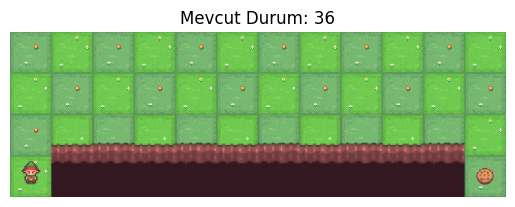

In [9]:
# 3. Sonucu Görselleştirin
frame = env.render()

plt.imshow(frame)
plt.axis("off")
plt.title(f"Mevcut Durum: {new_state}") # Başlığa durum numarasını ekleyelim
plt.show()

#### 4. 🧹 Ortamı Kapatın:
İşiniz bittiğinde kaynakları serbest bırakmak için `.close()` çağırarak ortamı düzgün bir şekilde kapatın.

In [10]:
# 4. Ortamı Kapatın
env.close()

---
### Bölüm 3: Ortamla Yönlendirilmiş Etkileşim

Bu sefer rastgele bir eylem seçmek yerine kasıtlı bir adım atacaksınız — **YUKARI** hareket edeceğiz. Bu, pekiştirmeli öğrenmede amaçlı karar verme fikrini pekiştirir.

#### 1. 🚀 Başlatın ve İlk Durumu Yazdırın:
- Ortamı yükleyin ve başlangıç durumunu almak için `.reset()` çağırın.  
- Herhangi bir eylem almadan önce başlangıç durumunu görüntülemek için `print()` kullanın.
- Şu çıktıyı almalısınız `(36, {'prob': 1})`

In [11]:
# Load the environment again, and initialize it
env = gym.make("CliffWalking-v0", render_mode="rgb_array")

# Reset the environment to the initial state
initial_state = env.reset()

# Print the initial state
print(initial_state)

(36, {'prob': 1})


#### 2. ⬆️ 'YUKARI' Eylemini Belirleyin ve Gerçekleştirin

- `.action_space`'i ve dokümantasyonu kontrol ederek **'YUKARI'** eylemi için indeksi bulun.  
- Bu eylemi gerçekleştirmek için `.step(action_index)` kullanın.  
- Şunları görmek için sonucu yazdırın:
  - Yeni durum  
  - Alınan ödül  
  - Bölümün bitip bitmediği (`done` bayrağı)

In [12]:
# Take a step to move 'UP'
action = 0  # 0: Yukarı, 1: Sağa, 2: Aşağı, 3: Sola

# Take the action
# Gymnasium'da step metodu 5 değer döndürür: observation, reward, terminated, truncated, info
new_state, reward, terminated, truncated, info = env.step(action)

# Print the new state, reward, and done status
print(f"Yeni Durum (New State): {new_state}")
print(f"Ödül (Reward): {reward}")
print(f"Bitti mi (Done/Terminated): {terminated}")

Yeni Durum (New State): 24
Ödül (Reward): -1
Bitti mi (Done/Terminated): False


#### 3. 🖼️ Ortamı Görselleştirin ve Kapatın

- Eylem sonrasında ortamı görselleştirmek için `.render()` kullanın — durumun nasıl değiştiğini görün.
- Ardından ortamı düzgün bir şekilde kapatmak ve sistem kaynaklarını serbest bırakmak için `.close()` çağırın.

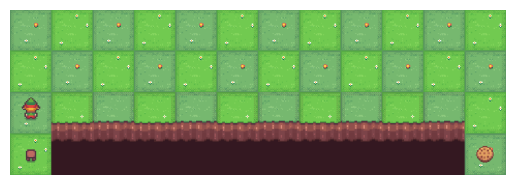

In [13]:
# Render the environment after taking a step
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

# Close the environment
env.close()

---
### Bölüm 4: Bir RL Algoritması Eğitmek

İlk olarak, `CliffWalking-v0` ortamını Stable Baselines3 modelleriyle eğitim için hazırlayacaksınız. Bu, RL algoritmalarıyla uyumluluğu sağlamak için uygun kurulum ve sarmalama içerir.

#### 🧱 1. Ortamı Yükleyin:
- `CliffWalking-v0` ortamını oluşturmak için `gym.make()` kullanın.  
- `render_mode='human'` ayarlayın → Etkileşim sırasında görsel geri bildirim sağlar.

In [14]:
# 1. Ortamı Yükleyin
# render_mode='human' eğitimi izlemenizi sağlar ancak süreci yavaşlatabilir.
env = gym.make("CliffWalking-v0", render_mode="human")

#### 🧵 2. Ortamı Sarın

Ortamınızı [`DummyVecEnv`](https://stable-baselines3.readthedocs.io/en/v1.0/guide/vec_envs.html#dummyvecenv) ile sarmak küçük ama kritik bir adımdır — RL kurulumunuzun Stable Baselines3 ile sorunsuz çalışmasını sağlar.

Devam edin ve ortamı Stable Baselines3'ten [`DummyVecEnv`](https://stable-baselines3.readthedocs.io/en/v1.0/guide/vec_envs.html#dummyvecenv) kullanarak sarın.  👇

In [15]:
# Ortamı SB3 ile uyumlu hale getirmek için sarın
env = DummyVecEnv([lambda: env])  # Doğru ortam işlemeyi sağlamak için lambda fonksiyonu

#### 🧵 `DummyVecEnv` Hakkında Daha Fazla

`DummyVecEnv`, Gym ortamlarını vektörleştirerek RL modelleriyle uyumlu hale getiren Stable Baselines3'ten bir sarmalayıcıdır.

#### ⚙️ Ne Yapar?

- **📦 API'yi Standartlaştırır**  
  Ortamın Stable Baselines3 algoritmaları için beklenen formatla eşleşmesini sağlar.

- **📊 Toplu İşlemeyi Etkinleştirir**  
  Tek bir ortamla bile etkileşimler bir toplu gibi işlenir — daha sonra `SubprocVecEnv` gibi araçlarla ölçekleme için gereklidir.

- **🔗 Uyumluluğu Sağlar**  
  `reset()` ve `step()`'i eğitim döngüleri içinde doğru çalışacak şekilde sarar.

#### 3. SB3'den Bir DQN Modeli Başlatın

Artık ortamınız hazır olduğuna göre, modeli başlatmanız gerekir. Bu durumda, Stable Baselines3 kullanarak bir Deep Q-Network (DQN) yapılandıracaksınız. DQN, Q-değerlerini tahmin etmek için bir sinir ağı kullanır — belirli bir durumda her eylem için beklenen ödülü tahmin eder.

#### 📝 Takip Edilecek Adımlar:
- `stable_baselines3`'den `DQN`'i içe aktarın. Bunu notebook'un en üstündeki hücreye ekleyin.
- Aşağıdaki parametrelerle DQN modelinin bir örneğini başlatın:
    - `'MlpPolicy'` kullanın — gözlemleri eylemlere eşleyen temel bir sinir ağı.  
    - `env`'i ortamınıza ve ayrıntılı eğitim günlükleri için `verbose=1`'e ayarlayın.
    - Eğitim metriklerini izlemek için `tensorboard_log` parametresi ekleyin. Bunu daha sonra TensorBoard ile eğitimi takip etmek için kullanacağız.

In [16]:
# 3. SB3'den Bir DQN Modeli Başlatın

# TensorBoard loglarının kaydedileceği klasör
log_path = "./dqn_cliff_walking_tensorboard/"

# Modeli oluşturuyoruz
model = DQN(
    "MlpPolicy",       # Gözlemleri işlemek için standart Sinir Ağı (Multi Layer Perceptron)
    env,               # Eğitileceğimiz ortam
    verbose=1,         # Eğitim sırasında çıktıları görmek için (1: Info, 0: Sessiz)
    tensorboard_log=log_path  # Grafikleri çizdirmek için log dosyası yolu
)

print("✅ Model başarıyla oluşturuldu ve eğitime hazır!")

Using cpu device
✅ Model başarıyla oluşturuldu ve eğitime hazır!


### 4. 🏋️‍♂️ DQN Modelini Eğitin ve Kaydedin

DQN modelinizi eğitme ve gelecekte kullanmak üzere kaydetme zamanı 🥳

#### 📝 Takip Edilecek Adımlar:

#### ⏱️ Eğitim Adım Sayısını Ayarlayın
- Modeli ne kadar süre eğiteceğinizi (ortamla etkileşim sayısı cinsinden) tanımlayın.  
- Şimdilik şunu kullanın: `total_timesteps = 1000`

#### 🧠 Modeli Eğitin
- Eğitimi başlatmak için DQN modelinizde `.learn()` çağırın.  
- Model, geri bildirimlere dayanarak zaman içinde politikasını geliştirecek.

#### 💾 Eğitilmiş Modeli Kaydedin
- Modeli diske kaydetmek için `.save()` kullanın.  
- Doğru kaydedildiğini doğrulamak için dosya yolunu yazdırın.

🎥 Eğitim sırasında işlenmiş ortamdaki adımları takip edebilirsiniz.

In [17]:
# Set training timesteps
total_timesteps = 1000

# Train the model (set `progress_bar=True` to show progress)
model.learn(total_timesteps=total_timesteps, progress_bar=True)

# Define model save path
model_path = "dqn_cliff_walking_model"

# Save the model
model.save(model_path)

print(f"✅ Model başarıyla kaydedildi: {model_path}.zip")

Logging to ./dqn_cliff_walking_tensorboard/DQN_1


Output()

✅ Model başarıyla kaydedildi: dqn_cliff_walking_model.zip


Tebrikler, ilk RL modelinizi eğittiniz!

---

### Bölüm 5: Görselleştirme Olmadan Verimli Eğitim

Bu bölümde, ortamı hazırlama, modeli yükleme ve eğitme sürecinin tamamından geçeceksiniz, ancak görsel işleme olmadan. Eğitim aşamasında görselleştirmeyi devre dışı bırakmak, hesaplama yükünü azalttığı için eğitim sürecini önemli ölçüde hızlandırabilir.

#### 📝 Takip Edilecek Adımlar:

#### 🧱 1. Ortamı Yükleyin ve Hazırlayın
- Görsel çıktıyı devre dışı bırakmak için `render_mode=None` kullanın.

#### ⚙️ 2. DQN Modelini Yapılandırın ve Başlatın
- Daha önce olduğu gibi `'MlpPolicy'` ve `DummyVecEnv` kullanın.  
- Günlük çıktısı istiyorsanız `verbose=1`'i koruyun.
- TensorBoard ile eğitimi takip edebilmemiz için bir TensorBoard günlükleme konumu `./dqn_tensorboard` ekleyeceğiz.

#### ⏱️ 3. Eğitim Parametrelerini Ayarlayın ve Eğitin
- Daha iyi öğrenme için adım sayısını artırın (örn. `total_timesteps = 100_000`).  
- Eğitimi başlatmak için `.learn()` çağırın.

#### 💾 4. Eğitilmiş Modeli Kaydedin
- Modelinizi saklamak için `.save("dqn_cliffwalking_fast")` kullanın.

Bu adımları izleyerek, ortamı görselleştirmenin ek hesaplama yükü olmadan verimli bir şekilde bir DQN modeli eğitir ve kaydedersiniz. Bu yaklaşım özellikle karmaşık modeller eğitirken veya sınırlı hesaplama kaynakları kullanırken faydalıdır.

In [18]:
# Load environment
# Görselleştirme yok (None), bu sayede çok hızlı çalışacak
env = gym.make("CliffWalking-v0", render_mode=None)

# Wrap the environment to be compatible with SB3
# Monitor wrapper'ı, eğitim istatistiklerini kaydetmek için faydalıdır.
# Not: SB3, tekli ortamları otomatik olarak DummyVecEnv ile de sarar.
env = Monitor(env)

# Load the model, match it with the environment, set a policy, add a logging location
model = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    tensorboard_log="./dqn_tensorboard"
)

# Set training timesteps
# 100.000 adım, ajanın ortamı iyice öğrenmesi için yeterli süreyi tanır
total_timesteps = 100000

# Train the model
model.learn(total_timesteps=total_timesteps, progress_bar=True)

# Define model save path
save_path = "dqn_cliffwalking_fast"

# Save the model
model.save(save_path)

Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./dqn_tensorboard/DQN_1


Output()

-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 1.5e+04   |
|    ep_rew_mean      | -1.94e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4         |
|    fps              | 2253      |
|    time_elapsed     | 26        |
|    total_timesteps  | 60110     |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 0.021     |
|    n_updates        | 15002     |
-----------------------------------


-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 1.13e+04  |
|    ep_rew_mean      | -1.37e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8         |
|    fps              | 2180      |
|    time_elapsed     | 41        |
|    total_timesteps  | 90160     |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 0.0089    |
|    n_updates        | 22514     |
-----------------------------------


-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 7.88e+03  |
|    ep_rew_mean      | -9.52e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12        |
|    fps              | 2174      |
|    time_elapsed     | 43        |
|    total_timesteps  | 94580     |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 2.98e-05  |
|    n_updates        | 23619     |
-----------------------------------


-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 6.1e+03   |
|    ep_rew_mean      | -7.33e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16        |
|    fps              | 2171      |
|    time_elapsed     | 44        |
|    total_timesteps  | 97586     |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 0.000174  |
|    n_updates        | 24371     |
-----------------------------------


#### 📊 Eğitim Günlük Metriklerini Anlamak

Bir pekiştirmeli öğrenme modelini eğitirken, çeşitli metrikler öğrenme ilerlemesini ve performansını izlemeye yardımcı olur.

#### 🎲 Rollout Metrikleri

- **exploration_rate** → Rastgele bir eylem alma olasılığı.  
  - Yüksek = daha fazla keşif  
  - Düşük = daha fazla istismar  

#### ⏱️ Zaman ile İlgili Metrikler

- **episodes** → Tamamlanan bölüm sayısı.  
- **fps** → Saniye başına kare (eğitimin ne kadar hızlı çalıştığı).  
- **time_elapsed** → Eğitim başladığından beri geçen toplam süre (saniye).  
- **total_timesteps** → Ortamda atılan toplam adım sayısı.

#### 🧠 Eğitim Metrikleri

- **learning_rate** → Model ağırlıklarına yapılan güncellemelerin boyutu.  
  - Düşük = daha yavaş ama daha kararlı öğrenme  
- **loss** → Modelin tahmin hatası.  
  - Azalan kayıp = öğrenme çalışıyor  
- **n_updates** → Modelin ağırlıklarını kaç kez güncellediği.

#### 🔍 Nasıl Yorumlanır

- **⬇️ exploration_rate** → Ajan keşiften öğrenilmiş davranışa geçiyor.  
- **⚡ Yüksek fps** → Eğitim verimli çalışıyor.  
- **📉 Azalan kayıp** → Model gelişiyor ve daha az hata yapıyor.

#### 🖥️ TensorBoard'u Başlatın

TensorBoard eğitimin nasıl gittiğini takip etmenizi sağlar. Etkileşimli pano öğrenme eğrilerini, ödül trendlerini ve daha fazlasını gösterir. 

TensorBoard kullanmak için:

1. Bir terminal penceresi açın.
1. Meydan okuma klasöründe olduğunuzdan emin olun!
1. Bu komutu çalıştırın (eğitim sırasında ayarladığınız yol ile değiştirmeniz gerekebilir):
   ```bash
   tensorboard --logdir=./dqn_cliff_tensorboard/
   ```
1. Terminalde gösterilecek bağlantıyı takip edin (muhtemelen `localhost:6006`).

Modeliniz hala eğitilirken TensorBoard'u başlatabilirsiniz: amacı eğitimin nasıl gittiğini takip etmektir. Eğitimin başlangıcında `No dashboards are active for the current data set.` uyarısı alabilirsiniz. **Biraz sabırlı olun: ilk bölüm bitene kadar hiçbir şey görmeyeceksiniz.**

TensorBoard'u notebook'unuzun içinde açmak da mümkün:

```bash
%load_ext tensorboard
%tensorboard --logdir=./dqn_cliff_tensorboard/
```

### 📦 Bölüm 6: Eğitilmiş Bir Model Kullanın

Sıfırdan tekrar eğitmek yerine, ajanınızın nasıl davrandığını hızlıca gözlemlemek için az önce eğittiğiniz modeli yükleyebilirsiniz.  
Alternatif olarak, mevcut olduğu takdirde daha güçlü önceden eğitilmiş bir model yükleyebilirsiniz.

#### 📥 1. Önceden Eğitilmiş Modeli Yükleyin

- Modeli diskten yüklemek için `.load("önceden_eğitilmiş_modelinizin_yolu")` kullanın.  
- Yolu kaydettiğiniz modelin gerçek konumuyla değiştirin.

In [19]:
# Define the path to the trained model
# Bölüm 5'te kaydettiğimiz dosya adını kullanıyoruz
model_path = "dqn_cliffwalking_fast"

# Load the model
# DQN sınıfının .load metodu, ağırlıkları diskten okur
model = DQN.load(model_path)

print(f"✅ Model başarıyla yüklendi: {model_path}")

✅ Model başarıyla yüklendi: dqn_cliffwalking_fast


#### 🧱 2. Ortamı Hazırlayın

Eğitilmiş modeli çalıştırmadan önce yeni bir bölüm başlatmak için ortamı yükleyin ve sıfırlayın.

In [20]:
# 2. Ortamı Hazırlayın

# Ortamı 'human' modunda yüklüyoruz ki hareketleri izleyebilelim
env = gym.make("CliffWalking-v0", render_mode="human")

# Ortamı sıfırlayıp başlangıç durumunu alıyoruz
observation, info = env.reset()

print("✅ Ortam sahnesi hazır! Ajan başlangıç noktasında bekliyor.")

✅ Ortam sahnesi hazır! Ajan başlangıç noktasında bekliyor.


#### 3. 🧠 En İyi Sonraki Eylemi Tahmin Edin

Mevcut gözleme dayalı olarak sonraki eylemi seçmek için modelin `.predict()` metodunu kullanın.

In [21]:
# 3. En İyi Sonraki Eylemi Tahmin Edin

# deterministic=True: Ajanın keşif yapmasını (rastgelelik) engeller
# ve sadece öğrendiği en iyi politikayı uygular.
action, _states = model.predict(observation, deterministic=True)

print(f"🤖 Modelin Tahmin Ettiği Eylem: {action}")

🤖 Modelin Tahmin Ettiği Eylem: 3


#### 4. 🚶‍♂️ Adımı Atın

- Tahmin edilen eylemi uygulamak için `.step(action)` kullanın.  
- Bu şunları döndürür:
  - Yeni durum  
  - Ödül  
  - Bir `done` bayrağı (bölüm bitmiş ise)  
  - Ek bilgi (varsa)

Ajanınız garip hareketler yaparsa veya sıkışırsa, paniklemeyın: muhtemelen yeterince uzun eğitim görmemiştir. Daha uzun eğitmeyi denemeden önce meydan okumanın sonuna kadar gidin 😉

In [23]:
# 3. En İyi Sonraki Eylemi Tahmin Edin
action, _states = model.predict(observation, deterministic=True)

# 🛠️ DÜZELTME BURADA: NumPy array'i Python int'e çeviriyoruz
action = int(action)  # veya action.item()

print(f"🤖 Modelin Tahmin Ettiği Eylem: {action}")

# 4. Adımı Atın
new_state, reward, terminated, truncated, info = env.step(action)

print(f"📍 Yeni Durum (New State): {new_state}")
print(f"🎁 Alınan Ödül (Reward): {reward}")
print(f"🛑 Bitti mi? (Terminated/Truncated): {terminated or truncated}")

🤖 Modelin Tahmin Ettiği Eylem: 3
📍 Yeni Durum (New State): 36
🎁 Alınan Ödül (Reward): -1
🛑 Bitti mi? (Terminated/Truncated): False


#### 5. 🖼️ Ortamı Görselleştirin

Eylem gerçekleştirildikten sonra ortamın mevcut durumunu görselleştirmek için `.render()` kullanın.

In [27]:
# 5. Ortamı Görselleştirin
env.render()

#### 6.  🧹 Ortamı Kapatın

Ortamı düzgün bir şekilde kapatmak ve sistem kaynaklarını serbest bırakmak için `.close()` kullanın.

In [28]:
# 6. Ortamı Kapatın
env.close()

---

### Bölüm 7: Tam Etkileşim Döngüsünü Uygulayın

Bu son alıştırmada, önceden eğitilmiş modelinizin bölüm bitene kadar ortamla adım adım etkileşim kurduğu tam bir döngü oluşturacaksınız.

- Eylemleri tekrarlamak için bir `while` döngüsü kullanın.
- Eylemleri seçmek için `.predict()` ve bunları uygulamak için `.step()` çağırın.
- Bir sonraki predict iterasyonuna yeni durumu beslediğinizden emin olun.
- Ne zaman döngüden çıkacağınızı bilmek için `.step()`'den gelen `done` bayrağını kullanın.
- Her adımdan sonra ajanı aksiyon halinde görselleştirmek için `.render()` çağırmayı unutmayın.

Yine, ajanınız garip hareketler seçerse veya sonsuz döngüye girerse, paniklemeyın: muhtemelen yeterince uzun eğitim görmemiştir. Ajanınız sonsuz döngüye girdiyse, hücrenin yürütülmesini durdurun.

👉 Daha uzun eğitmeyi denemeden önce meydan okumanın sonuna kadar gidin.

In [30]:
from stable_baselines3.common.vec_env import DummyVecEnv

# Modeli yükle
model = DQN.load("dqn_cliffwalking_fast")

# Ortamı hazırla (DummyVecEnv içinde)
env = DummyVecEnv([lambda: gym.make("CliffWalking-v0", render_mode="human")])

# Başlat
obs = env.reset()

print("🎬 Ajan harekete geçiyor... (Maksimum 100 adım)")

# --- GÜVENLİK SAYACI ---
max_steps = 100
current_step = 0

while True:
    # Eylem seç
    action, _states = model.predict(obs, deterministic=True)
    
    # Adımı uygula
    obs, rewards, dones, infos = env.step(action)
    
    # Görselleştir
    env.render()
    
    # Sayaç kontrolü
    current_step += 1
    
    # Çıkış koşulları: Ya oyun bitti (dones[0]) YA DA adım sayısı doldu
    if dones[0]:
        print("🏁 Hedefe ulaşıldı veya Uçuruma düşüldü (Bölüm bitti)!")
        break
        
    if current_step >= max_steps:
        print("⚠️ Ajan kayboldu: Maksimum adım sayısına ulaşıldı, döngü kırılıyor.")
        break

# Kapat
env.close()

🎬 Ajan harekete geçiyor... (Maksimum 100 adım)
⚠️ Ajan kayboldu: Maksimum adım sayısına ulaşıldı, döngü kırılıyor.


### 🤔 Ajanınızın Davranışından Memnun Değil misiniz?

Endişelenmeyin — seçenekleriniz var:

- 🏋️‍♂️ **Daha uzun eğitin** → Performansı artırmak için bölüm sayısını artırmayı deneyin.
- 📦 **Veya bizim önceden eğitilmiş modelimizi yükleyin** →  
  **500.000 bölüm** için bir tane eğittik — indirmek için aşağıdaki hücrenin yorumunu kaldırın ve çalıştırın.

In [31]:
!curl https://d37p7d5kaxknzw.cloudfront.net/projects/best_dqn_cliffwalking.zip > best_dqn_cliffwalking.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  139k  100  139k    0     0   520k      0 --:--:-- --:--:-- --:--:--  520k


In [32]:
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
import gymnasium as gym

# 1. İndirdiğimiz "Usta" Modeli Yükle
# .zip uzantısını belirtmeseniz de SB3 genelde anlar ama garanti olsun diye ekleyebiliriz.
model = DQN.load("best_dqn_cliffwalking") 

# 2. Ortamı Hazırla
env = DummyVecEnv([lambda: gym.make("CliffWalking-v0", render_mode="human")])

# 3. Bölümü Başlat
obs = env.reset()

print("🌟 Profesyonel ajan sahnede! (Hedefe kilitlendi)")

while True:
    # Deterministik (en iyi) kararı ver
    action, _states = model.predict(obs, deterministic=True)
    
    # Adımı uygula
    obs, rewards, dones, infos = env.step(action)
    
    # Görselleştir
    env.render()
    
    # Bitiş kontrolü
    if dones[0]:
        print("🏆 Ve mutlu son! Ajan hedefe başarıyla ulaştı.")
        break

# Ortamı kapat
env.close()

🌟 Profesyonel ajan sahnede! (Hedefe kilitlendi)
🏆 Ve mutlu son! Ajan hedefe başarıyla ulaştı.


### ❄️ Son not: `is_slippery=True` Anlamak

Dokümantasyonu okurken `is_slippery` parametresinin ne yaptığını merak etmiş olabilirsiniz.

`CliffWalking`'de `is_slippery=True` ayarlamak, ajanın eylemlerine rastgelelik ekler — ajanın kayıp istenmeyen bir yöne hareket etme şansını tanıtır. `is_slippery=True` ile eğitim yapmak, belirsizlikle başa çıkabilen ajanlar oluşturur — gerçek dünya uygulamaları için kritik bir beceri.

#### 🎯 Neden stokastisite ekleyelim?

- **🌍 Gerçekçilik** → Gerçek dünya ortamlarında bulunan belirsizliği simüle eder.  
- **🛡️ Sağlamlık** → Ajanların daha güvenilir, uyum sağlayabilen stratejiler öğrenmesine yardımcı olur.  
- **🔥 Meydan okuma** → Görevi daha zor ve çözülmesi daha ilginç hale getirir.

#### 🤔 Peki neden burada `True` yapmadık?

DQN algoritması basit kullanım durumları için tasarlanmıştır. `slippery=True`'nun `CliffWalking` ortamına eklediği yüksek stokastisite ile mücadele eder. Şunu düşünün: bu basit ortamda, amaçlanan yönü takip etmemek hemen tamamen farklı bir yöne gitmek anlamına gelir: 90 derece, hatta 180 derece! Basit bir algoritmanın öğrenmesi çok zor olurdu.

### Projeyi tamamladığınız için tebrikler 🏁